# 分布

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

## 箱线图

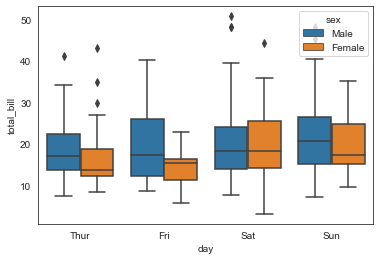

In [7]:
tips = sns.load_dataset('tips')

sns.boxplot(x=tips['day'], y=tips['total_bill'], hue=tips['sex'])

## 小提琴图

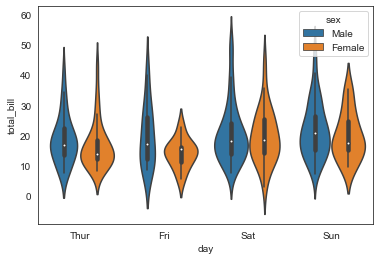

In [8]:
tips = sns.load_dataset('tips')

sns.violinplot(x=tips['day'], y=tips['total_bill'], hue=tips['sex'])

## 矩阵散点图 - pairplot()
### 普通矩阵图示意

C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


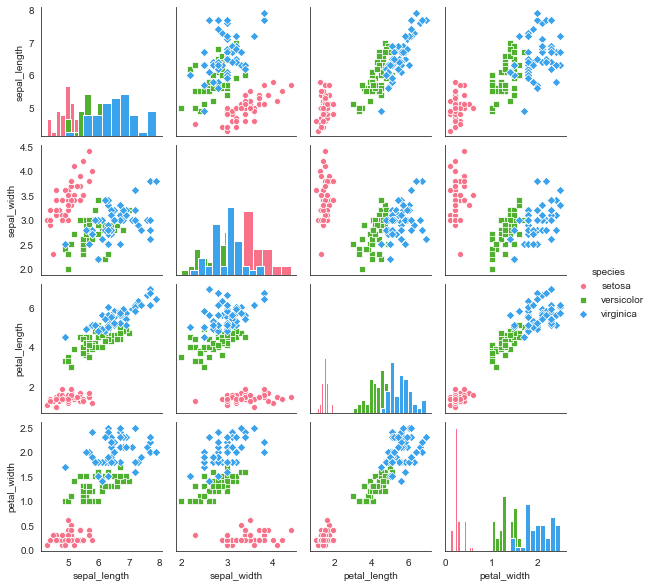

In [2]:
# 设置风格
sns.set_style('white')
# 读取数据
iris = sns.load_dataset('iris')

sns.pairplot(iris,
             kind = 'scatter',              # 散点图/回归分布图{'scatter', 'reg'})
             diag_kind = 'hist',            # 直方图/密度图{'hist'， 'kde'}
             hue = 'species',               # 按照某一字段进行分类
             palette = 'husl',              # 设置调色板
             markers = ['o', 's', 'D'],     # 设置不同系列的点样式（这里根据参考分类个数）
             size = 2)                       # 图标大小

### 只提取局部变量进行对比

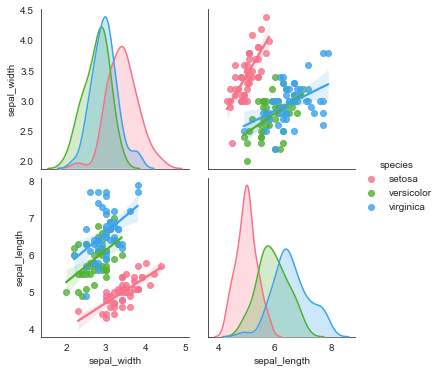

In [3]:
g = sns.pairplot(iris, 
                 vars = ['sepal_width', 'sepal_length'],
                 kind = 'reg', 
                 diag_kind = 'kde',
                 hue = 'species', 
                 palette = 'husl')

### 其它参数设置

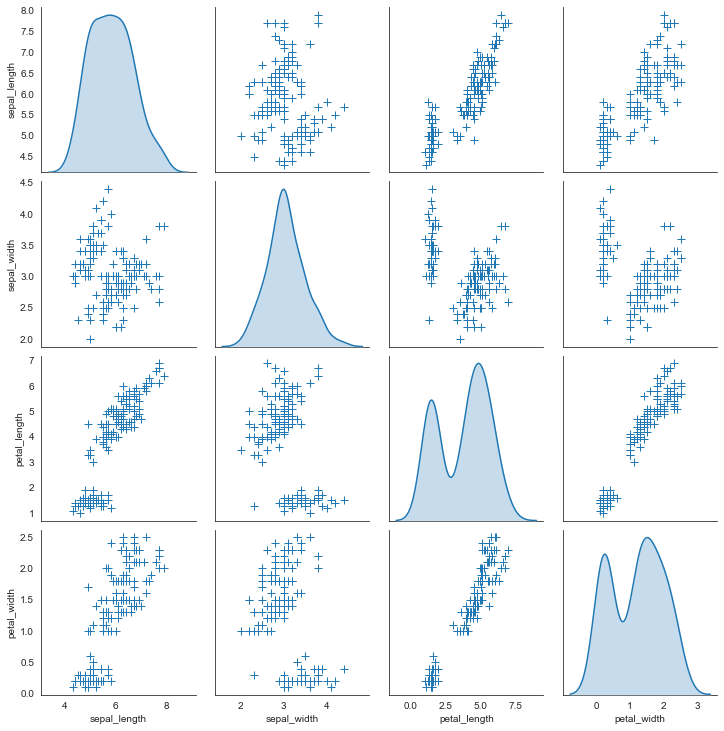

In [4]:
# 其它参数设置
sns.pairplot(iris, 
             diag_kind = 'kde',
             markers = '+',
             plot_kws = dict(s = 50, edgecolor = 'b', linewidth = 1),    # 设置点样式
             diag_kws = dict(shade = True)                               # 设置密度图样式
             )

## 拆分绘制矩阵散点图 - PairGrid()

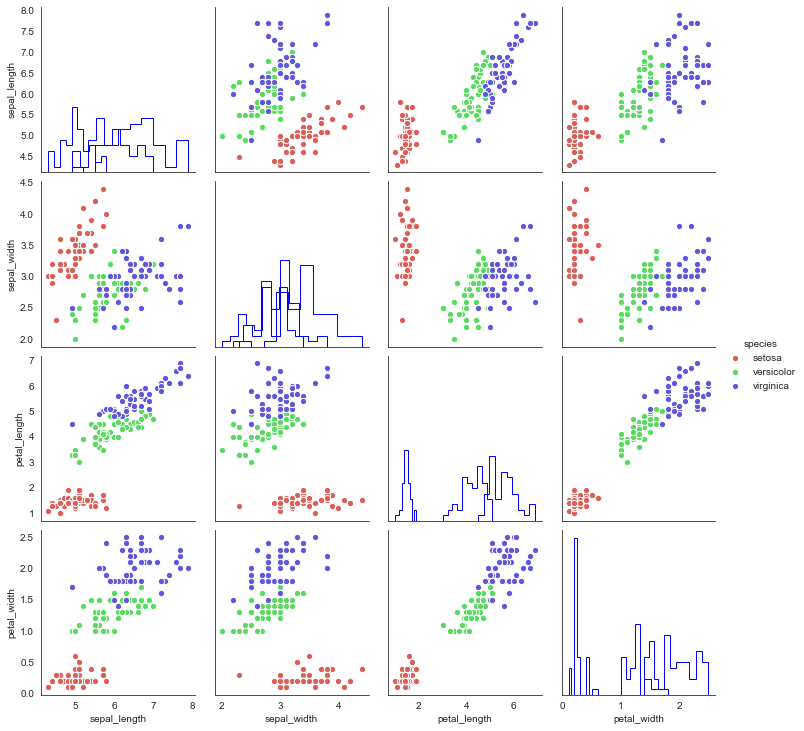

In [5]:
# map_diag() + map_offdiag()
g = sns.PairGrid(iris, 
                 hue= 'species', palette = 'hls',
                 vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
                 # 可筛选创建一个绘图表格区域，设置好x，y对应的数据，按照species分类

# 对角线图表，plt.hist/sns.kdeplot
g.map_diag(plt.hist,
           histtype = 'step',                # 可选：'bar','barstacked', 'step', 'stepfilled'
           linewidth = 1, edgecolor = 'b')
 
# 其它图表：plt.scatter/plt.bar...
g.map_offdiag(plt.scatter, edgecolor = 'w', s = 40, linewidth = 1)    # 设置点颜色、大小、描边宽度
g.add_legend() #添加图例()

### 上三角和下三角

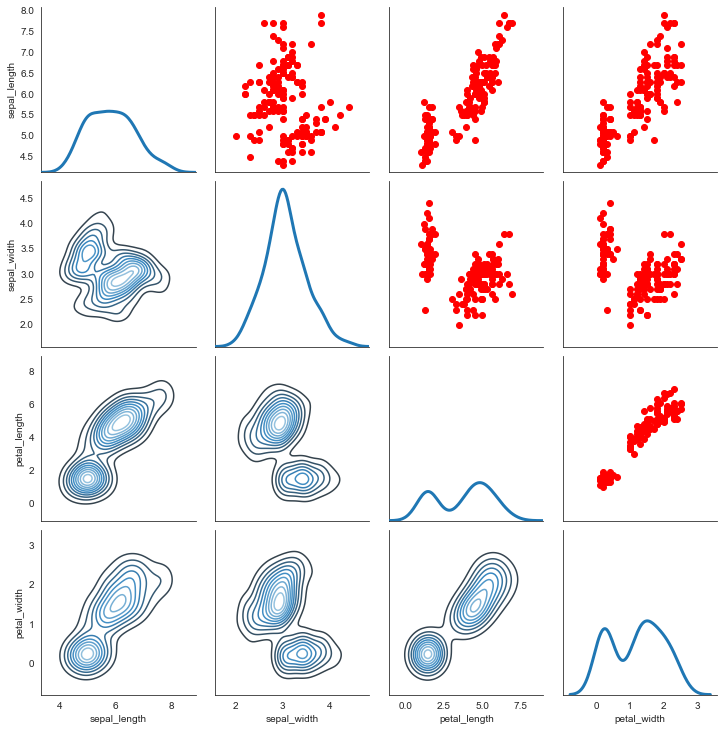

In [6]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, lw=3)                # 设置对角线图表
g.map_upper(plt.scatter, color = 'r')        # 设置对角线上端图表
g.map_lower(sns.kdeplot, cmap='Blues_d')     # 设置对角线下端图表 